In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [ ]:
# Criação do DataFrame
df_vendas = pd.DataFrame(dados_vendas)

In [ ]:
# Adicionando uma coluna de meses numericos
df_vendas['mes'] = range(1, 13)

In [ ]:
# Visualização do dataframe
df_vendas.head(12)

,mes,vendas
0,1,2000
1,2,2200
2,3,2300
3,4,2500
4,5,2600
5,6,2700
6,7,2800
7,8,2900
8,9,3000
9,10,3100


In [ ]:
# Separando os dados em X e y
X = df_vendas[['mes']]
y = df_vendas['vendas']

In [ ]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criação e treinamento do modelo de regressão linear
model_rg = LinearRegression()
model_rg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predição dos valores de vendas
y_pred = model_rg.predict(X_test)

In [ ]:
# Cálculo do R2 Score
r2_score_vendas = r2_score(y_test, y_pred)
print(f"R2 Score: {r2_score_vendas}")

R2 Score: 0.9804933170681456


In [ ]:
# Cálculo o erro médio absoluto
mae_vendas = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae_vendas}")

MAE: 54.841713221601516


In [ ]:
# Cálculo o erro quadrático médio
mse_vendas = root_mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_vendas}")

MSE: 75.92962867662598


In [ ]:
# Previsão d vendas para o mês de dezembro
model_rg.predict([[12]])[0]

/Users/igcruz/.local/share/virtualenvs/challenge_ai_scikit-rALzmuSg/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(3331.8435754189945)

array([[<Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'vendas'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

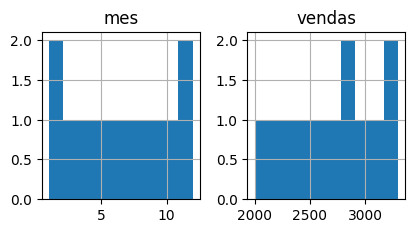

In [14]:
# Plotar histograma de vendas
df_vendas.hist(layout=(2,4), figsize=(10, 5))

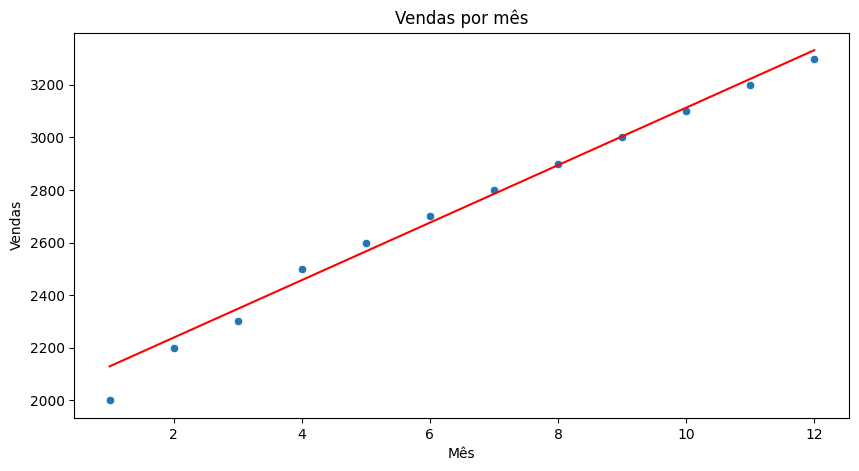

In [15]:
# Plotar scatterplot de vendas por mês
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_vendas, x='mes', y='vendas')
plt.plot(df_vendas['mes'], model_rg.predict(df_vendas[['mes']]), color='red')
plt.title('Vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()